# Les 2: Modellen

Nadat we in de vorige les hebben geleerd hoe je met behulp van statistiek analyses kunt doen van je data, gaan we in deze les de computer aan het werk zetten om de geleerde analysetechnieken in te zetten om voorspellingen te doen.

Dat is immers waar het bij Data Science allemaal om draait: de computer leren patronen te herkennen in onze data zodat het nemen van beslissingen zoveel mogelijk kan worden geautomatiseerd.

De volgende onderwerpen komen in dit notebook aan bod:

- Correlaties
- Lineaire regressie-analyse
- Clustering
- Decision trees
- Ensemble models


## Uitvoeren op Google Colab

Dit notebook kan worden uitgevoerd op Google Colab. Hiervoor is een Google-account vereist.

Klik op de knop "Open in Google Colab" om het notebook te openen in Google Colab:


<a href="https://colab.research.google.com/github/mcdejonge/beginnen_met_data_science/blob/main/les_2_modellen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In het codeblok hieronder worden alle bibliotheken ingeladen die in dit notebook worden gebruikt.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

## 2.1 Correlaties en lineaire verbanden

Voordat we de computer echt aan het werk kunnen zetten, moeten we ons repertoire aan statistische kennis nog iets verder uitbreiden. We moeten weten hoe je vast kunt stellen dat er een verband bestaat tussen twee variabelen.

Stel, we meten elke dag wat de gemiddelde temperatuur per dag is. Dat is onze eerste variabele. Daarnaast houden we per dag bij hoeveel ijsjes er zijn verkocht - onze tweede variabele. Waar we uiteindelijk naartoe willen, is een model dat geheel automatisch voor ons op basis van de weersverwachting voor de komende dagen kan voorspellen hoeveel ijsjes er verkocht gaan worden. Een dergelijk model is bijvoorbeeld handig voor uitbaters van strandtenten, ijsfabrikanten enzovoort.

Laten we om te beginnen eens kijken naar onze data. Omdat er twee kolommen (variabelen) zijn, kunnen we een scatterplot maken om het verband tussen de variabelen in beeld te brengen.

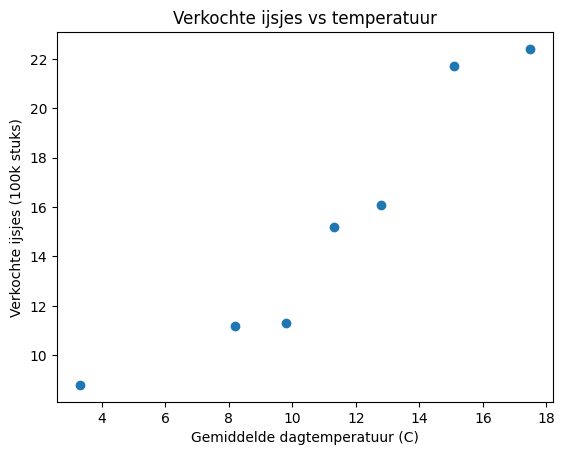

In [9]:
# We maken een nieuw dataframe met fictieve gegevens over het aantal
# verkochte ijsjes (per 100k) en de gemiddelde temperatuur (in graden Celcius)
dfijsjes = pd.DataFrame({
    'temperatuur' : [8.2,  9.8,  3.3,  11.3, 12.8, 17.5, 15.1],
    'ijsjes' :      [11.2,   11.3,   8.8,    15.2,   16.1,   22.4,   21.7 ]
})

# We maken een scatterplot van ons dataframe om het verband tussen de
# twee variabelen in beeld te brengen.
plt.scatter(dfijsjes['temperatuur'], dfijsjes['ijsjes'])
# Vanaf nu gaan we onze grafiekjes ook netjes labelen zodat onmiddellijk duidelijk is waar we naar kijken.
plt.title('Verkochte ijsjes vs temperatuur')
plt.ylabel('Verkochte ijsjes (100k stuks)')
plt.xlabel('Gemiddelde dagtemperatuur (C)')
plt.show()

Er lijkt een duidelijk verband te zitten tussen de gemiddelde dagtemperatuur en het aantal verkochte ijsjes. Verder lijkt het erop alsof dat verband *lineair* is - dat wil zeggen dat je een rechte lijn zou kunnen trekken door alle datapunten heen waarbij de afstand tussen die lijn en de datapunten klein blijft.

Het trekken van zo'n lijn is een werkje dat je beter door een computer kunt laten doen (er komt erg veel - op zichzelf eenvoudig - rekenwerk bij kijken). Hoe je dit precies doet, komt aan bod in paragraaf 2.2, "Ons eerste model: lineaire regressie". Voor nu is het voldoende als we op het oog herkennen dat je een rechte lijn zou *kunnen* trekken door deze datapunten.


Wat we wél gaan doen, is de computer laten uitrekenen hoe *sterk* het lineaire verband is tussen de twee variabelen.

Een andere term voor "verband tussen twee variabelen" is *correlatie*, vandaar dat we meestal zeggen dat we de *correlatie* gaan berekenenen tussen twee variabelen.

In Python gaat dat heel eenvoudig:

In [10]:
dfijsjes['ijsjes'].corr(dfijsjes['temperatuur'])

np.float64(0.9482947145707615)

De berekende correlatie is `0,94`. Dat is enorm hoog - doorgaans zijn we al tevreden met een correlatie van `0.7`. In de sociale wetenschappen en ook in bedrijfskundig onderzoek zijn zelfs nóg lagere correlaties gebruikelijk.

De oorzaak voor deze hoge correlatie is natuurlijk dat de gebruikte data kunstmatig is en speciaal gemaakt is om uit te leggen wat correlaties en lineaire verbanden zijn.

Hieronder zien we een voorbeeld van twee variabelen waar juist helemaal geen verband tussen bestaat (beide reeksen cijfers zijn volkomen willekeurig gegenereerd). 

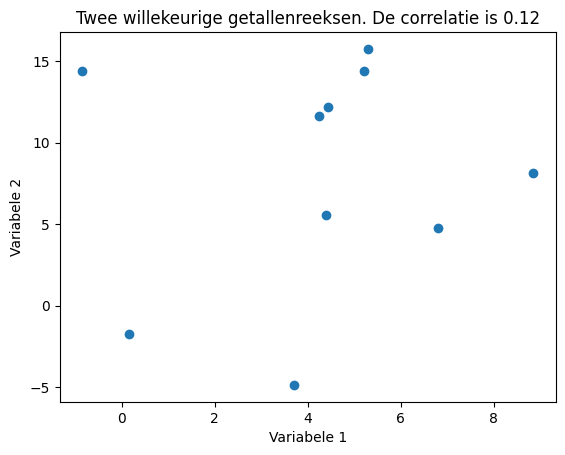

In [20]:
# Hoe deze code werkt, is voor nu niet zo interessant. Het gaat om de grafiek.
np.random.seed(39)
dfrandom = pd.DataFrame({
    # Maak 2 reeksen van willekeurig gegenereerde maar normaal verdeelde getallen.
    'var1' : np.random.normal(4, 2, 10),
    'var2' : np.random.normal(6, 8, 10)
})
plt.scatter(dfrandom['var1'], dfrandom['var2'])
plt.title(f"Twee willekeurige getallenreeksen. De correlatie is {dfrandom['var1'].corr(dfrandom['var2']):.2f}")
plt.xlabel('Variabele 1')
plt.ylabel('Variabele 2')
plt.show()


We zien datapunten die willekeurig over de grafiek zijn verdeeld (wat logisch is, aangezien ze willekeurig zijn gegenereerd). De correlatie is dan ook laag: `0,12`, wat zoveel betekent als: *geen correlatie van betekenis*.

Het is op zich mogelijk om een lijn te trekken door deze datapunten, maar elk datapunt zou dan erg ver van de lijn liggen. De betekenis van de lijn (het lineaire verband) is dan niet groot.

### 2.1.1 Wat is de betekenis van een hoge correlatie?

Wat een hoge correlatie precies betekent, hangt af van het soort data waarvoor je de correlatie berekent.

In het voorbeeld van de temperatuur en het aantal verkochte ijsjes betekent een hoge correlatie: "als de gemiddelde dagtemperatuur omhoog gaat, stijgt het aantal verkochte ijsjes".

Rekenkundig gezien geeft de waarde voor de correlatie, de zogenoemde *correlatie-coëfficiënt* weer *welk deel* van de verandering in de ene variabele (`b`) verklaard wordt door een verandering in de andere variabele (`a`). Is de correlatie-coëfficiënt 1, dan veroorzaakt elke verandering in variabele `a` een precies even grote verandering in variabele `b`. Is de correlatie-coëfficiënt 0.5, dan verklaart elke verandering in variabele `a` de *helft* van de verandering in variabele `b` en is de correlatie-coëfficiënt 0 dan hebben veranderingen in `a` en `b` helemaal niets met elkaar te maken.

**Belangrijk** hoewel we zeggen dat veranderingen in `a` veranderingen in `b` "verklaren", betekent dat *niet* dat correlatie een oorzaak-gevolg relatie aanduidt. Het is nadrukkelijk niet zo dat je kunt stellen dat een hogere temperatuur een grotere ijsverkoop *tot gevolg* heeft - je kunt alleen zeggen dat een hogere temperatuur *samenhangt* met een grotere ijsverkoop.

Een voorbeeld om dit te verduidelijken is bijvoorbeeld het volgende: stel dat we alleen gegevens hebben over het aantal verkochte ijsjes én over het aantal keren dat de reddingsbrigade uit moet varen op een dag. Ook tussen deze twee variabelen is de correlatie sterk en waarschijnlijk vrijwel net zo sterk als tussen het aantal verkochte ijsjes en de gemiddelde temperatuur. Toch zal het onmiddellijk duidelijk zijn dat er niet meer ijsjes worden verkocht alleen omdat er ergens in Scheveningen een boot met reddingswerkers de zee op gaat.

We zeggen daarom ook wel: **correlatie is geen causaliteit** (causaliteit: een *oorzakelijk* verband).

### Opgave

In les 1 hebben we door onze oogharen gekeken naar het verband tussen snavellengte (`culmen_length_mm`) en zwemvlieslengte (`flipper_length_mm`). We dachten een lineair verband te kunnen zien.

Nu gaan we berekenen hoe sterk dat verband is. Lees de pinguin-data in (`data/palmerpenguins/penguins_size_clean.csv`) en laat Python de correlatie-coëfficiënt berekenen voor de kolommen `culmen_length_mm` en `flipper_length_mm`.

In [25]:
# Plaats hier je voorbeeldcode.


## 2.2 Ons eerste model: lineaire regressie

## 2.3 Ons tweede model: clustering

## 2.4 Decision trees

## 2.5 Ensemble models


## Portfolio-opdracht